In [97]:
import polars as pl
import re 
import os 
import time, datetime
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [101]:
def process_dataframe(df: pl.DataFrame, time: str):
    active_price = list(df.filter((pl.col("reserveX") > 0) & (pl.col("reserveY") > 0))["bin_price"])[0]
    dt = datetime.datetime.utcfromtimestamp(time).strftime('%m-%d %H:%M')
    return {"timestamp" : time, "datetime" : dt, "activePrice" : active_price}


In [136]:
def draw_chart(data: list) -> None:
    df = pl.DataFrame(data)

    xticks = df["datetime"][::5]
    xtick_lables = df["datetime"][::5]

    fig, ax = plt.subplots()
    graph = sn.lineplot(x="datetime", y="activePrice", data=df)
    # # graph.set_xticks(range(len(df))) # <--- set the ticks first
    # graph.set_xticklabels(list(df["datetime"])) # LinearLocator(int(len(df)/8))
    fig.set_size_inches(10.5, 7.5, forward=True)
    # ax.ticklabel_format(style='plain', useOffset=False)
    ax.set_xticks(xticks)
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()

In [47]:
def load_csv_data(dir: str, start_time: int, end_time: int) -> list:
    data = []
    for file_name in sorted(os.listdir(dir)):
        time = int(re.search("\d+", file_name).group(0))
        if time > start_time and time < end_time:
            path = os.path.join(dir, file_name)
            df = pl.read_csv(path)
            data.append(process_dataframe(df, time))
    
    return data

In [28]:
utc_now = datetime.datetime.utcnow()
week_ago = utc_now - datetime.timedelta(days=1)
unix_now, unix_week_ago = int(time.mktime(utc_now.timetuple())), int(time.mktime(week_ago.timetuple()))

In [102]:
data = load_csv_data("../outputs/csvs", unix_week_ago, unix_now)

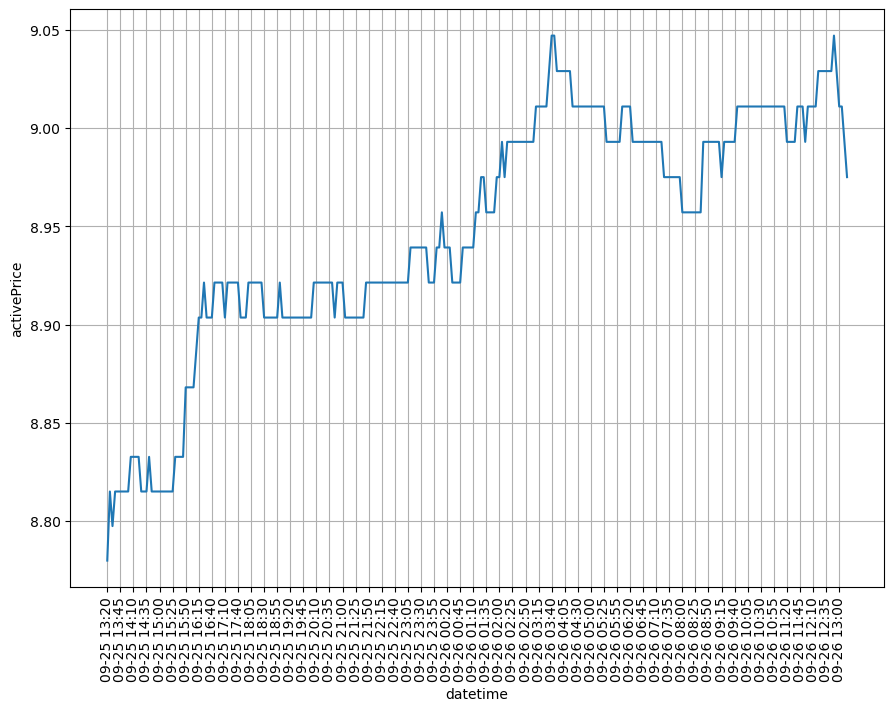

In [137]:
draw_chart(data)